![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSE8B3-dtSdbcGCskxy9oF2kAMkP99zwXOQKA&usqp=CAU)

# HISTORY

## THE PROJECT WILL PROGRESS IN PIECE
## PART I: FITS REVIEW

#### Space Objects Around All Black Holes
* A dataset containing the objects around all black holes (planets, meteors, comets, etc.) and the environments in which black holes have been observed so far by Hubble.

* Filenames are the names of black holes.
* Files are coded as fits.

#### WHAT IS FITS FILES?

* Flexible Image Transport System (FITS) is an open standard defining a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables FITS is the most commonly used digital file format in astronomy. The FITS standard was designed specifically for astronomical data, and includes provisions such as describing photometric and spatial calibration information, together with image

#### FITS IMAGES

* The earliest and still most commonly used type of FITS data is an image header/data block. The term 'image' is somewhat loosely applied, as the format supports data arrays of arbitrary dimension—normal image data are usually 2-D or 3-D, with the third dimension representing for example time or the color plane. The data themselves may be in one of several integer and floating-point formats, specified in the header.

* FITS image headers can contain information about one or more scientific coordinate systems that are overlaid on the image itself. Images contain an implicit Cartesian coordinate system that describes the location of each pixel in the image, but scientific uses usually require working in 'world' coordinates, for example the celestial coordinate system. As FITS has been generalized from its original form, the world coordinate system (WCS) specifications have become more and more sophisticated: early FITS images allowed a simple scaling factor to represent the size of the pixels; but recent versions of the standard permit multiple nonlinear coordinate systems, representing arbitrary distortions of the image. The WCS standard includes many different spherical projections, including, for example, the HEALPix spherical projection widely used in observing the cosmic microwave background radiation.

![](https://hinode.nao.ac.jp/uploads/2016/04/22/Lv0_FITS_format.gif)

* CHECK: https://docs.astropy.org/en/stable/io/fits/index.html
* CHECK: https://docs.astropy.org/en/stable/io/fits/usage/headers.html
* CHECK: https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html

# PACKAGES AND LIBRARIES

In [ ]:
!pip install astropy

In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import astropy
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy import signal
from scipy.fft import fftshift
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# OVERVIEW AND ANALYSIS PROCESS

#### PATH & SERIES

In [ ]:
Messier_87_Path =Path("../input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/MESSIER87")

In [ ]:
Messier_87_Fits = list(Messier_87_Path.glob(r"**/*.fits"))

In [ ]:
print("LEN FITS LIST: ",len(Messier_87_Fits))

In [ ]:
Messier_87_Fits_Series = pd.Series(Messier_87_Fits,name="MESSIER87").astype(str)

In [ ]:
Messier_87_Fits_Series

#### IMAGE EXPORTING

In [ ]:
Example_Path = Messier_87_Fits_Series[0]

##### GETTING ACCESS

In [ ]:
Messier87_Document = fits.open(Example_Path)

#### FILE INFORMATIONS

In [ ]:
print("INFORMATION\n")
print(Messier87_Document.info())

* As you can see, the ones with values are the SCI and PEAKUP parameters.

In [ ]:
print("PRIMARY INFO:\n")
print(Messier87_Document.fileinfo("PRIMARY"))
print("---"*10)
print("SCI INFO:\n")
print(Messier87_Document.fileinfo("SCI"))
print("---"*10)
print("ERR INFO:\n")
print(Messier87_Document.fileinfo("ERR"))
print("---"*10)
print("DQ INFO:\n")
print(Messier87_Document.fileinfo("DQ"))
print("---"*10)
print("PEAKUP INFO:\n")
print(Messier87_Document.fileinfo("PEAKUP"))
print("---"*10)
print("FILE NAME:\n")
print(Messier87_Document.filename())
print("---"*10)
print("PART TYPE:\n")
print(type(Messier87_Document["PRIMARY"]))

#### HEADER INFORMATIONS

##### ImageHDU INFORMATIONS

In [ ]:
print("HEADER ImageHDU:\n")
print(Messier87_Document[1].header)
print("---"*10)

In [ ]:
print("HEADER ImageHDU:\n")
print(Messier87_Document[2].header)
print("---"*10)

In [ ]:
print("HEADER ImageHDU:\n")
print(Messier87_Document[3].header)
print("---"*10)

In [ ]:
print("HEADER ImageHDU:\n")
print(Messier87_Document[4].header)
print("---"*10)

In [ ]:
print("partial of first axis coordinate w.r.t. x:\n")
print(Messier87_Document[1].header['CD1_1'])
print("---"*10)
print("partial of first axis coordinate w.r.t. y:\n")
print(Messier87_Document[1].header['CD1_2'])
print("---"*10)
print("partial of second axis coordinate w.r.t. x:\n")
print(Messier87_Document[1].header['CD2_1'])
print("---"*10)
print("partial of second axis coordinate w.r.t. y:\n")
print(Messier87_Document[1].header['CD2_2'])
print("---"*10)
print("RA of aperture reference position:\n")
print(Messier87_Document[1].header['RA_APER'])
print("---"*10)
print("Declination of aperture reference position:\n")
print(Messier87_Document[1].header['DEC_APER'])
print("---"*10)
print("Position Angle of reference aperture center:\n")
print(Messier87_Document[1].header['PA_APER'])
print("---"*10)
print("position angle of image y axis (deg. e of n):\n")
print(Messier87_Document[1].header['ORIENTAT'])
print("---"*10)
print("angle between sun and V1 axis:\n")
print(Messier87_Document[1].header['SUNANGLE'])
print("---"*10)
print("angle between moon and V1 axis:\n")
print(Messier87_Document[1].header['MOONANGL'])
print("---"*10)
print("altitude of the sun above Earth's limb:\n")
print(Messier87_Document[1].header['SUN_ALT'])
print("---"*10)
print("UT date of start of observation (yyyy-mm-dd):\n")
print(Messier87_Document[1].header['DATE-OBS'])
print("---"*10)
print("exposure end time (Modified Julian Date):\n")
print(Messier87_Document[1].header['EXPEND'])
print("---"*10)
print("average of the dark values subtracted:\n")
print(Messier87_Document[1].header['MEANDARK'])
print("---"*10)
print("average of all bias levels subtracted:\n")
print(Messier87_Document[1].header['MEANBLEV'])
print("---"*10)
print("Slit Wheel Absolute position:\n")
print(Messier87_Document[1].header['OSWABSP'])
print("---"*10)

##### PrimaryHDU INFORMATIONS

In [ ]:
print("HEADER PrimaryHDU:\n")
print(Messier87_Document[0].header)
print("---"*10)

In [ ]:
print("date this file was written:\n")
print(Messier87_Document[0].header['DATE'])
print("---"*10)
print("proposer's target name:\n")
print(Messier87_Document[0].header['targname'])
print("---"*10)
print("Subtract dark image:\n")
print(Messier87_Document[0].header['DARKCORR'])
print("---"*10)
print("general galaxy type:\n")
print(Messier87_Document[0].header['TARDESCR'])
print("---"*10)
print("minimum wavelength in spectrum:\n")
print(Messier87_Document[0].header['MINWAVE'])
print("---"*10)
print("maximum wavelength in spectrum:\n")
print(Messier87_Document[0].header['MAXWAVE'])
print("---"*10)
print("type object:\n")
print(Messier87_Document[0].header['PROPTTL1'])
print("---"*10)
print("plate scale (arcsec/pixel):\n")
print(Messier87_Document[0].header['PLATESC'])
print("---"*10)
print("imaging or spectroscopic:\n")
print(Messier87_Document[0].header['OBSTYPE'])
print("---"*10)
print("Pipeline processing time (MJD):\n")
print(Messier87_Document[0].header['PROCTIME'])
print("---"*10)
print("declination of the target (deg) (J2000):\n")
print(Messier87_Document[0].header['DEC_TARG'])
print("---"*10)
print("right ascension of the target (deg) (J2000):\n")
print(Messier87_Document[0].header['RA_TARG'])
print("---"*10)

#### GETTING IMAGE DATA

In [ ]:
IMG_File = get_pkg_data_filename(Example_Path)
Messier87_IMG = fits.getdata(IMG_File, ext=0)
# METHOD 1

In [ ]:
Messier87_IMG_Data = Messier87_Document[1].data
# METHOD 2

* both are the same

In [ ]:
print("SHAPE: ",Messier87_IMG_Data.shape)
print("SIZE: ",Messier87_IMG_Data.size)
print("TYPE: ",type(Messier87_IMG_Data))

In [ ]:
print("SHAPE: ",Messier87_IMG.shape)
print("SIZE: ",Messier87_IMG.size)
print("TYPE: ",type(Messier87_IMG))

In [ ]:
plt.style.use("dark_background")

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(Messier87_IMG,cmap="gray")
plt.xlabel(f"{Messier87_Document[1].header['CD1_1']} - {Messier87_Document[1].header['CD1_2']}\n {Messier87_Document[1].header['CD2_1']} - {Messier87_Document[1].header['CD2_2']}")
plt.ylabel(f"{Messier87_Document[0].header['DEC_TARG']}\n{Messier87_Document[0].header['RA_TARG']}")
plt.title(f"{Messier87_Document[0].header['TARDESCR']} - {Messier87_Document[0].header['targname']}\n{Messier87_Document[0].header['PROPTTL1']}")
plt.colorbar()
plt.show()

##### FLATTEN FOR PLOT

In [ ]:
Messier87_IMG_Flatten = Messier87_IMG_Data.flatten()

In [ ]:
print("SHAPE: ",Messier87_IMG_Flatten.shape)
print("SIZE: ",Messier87_IMG_Flatten.size)
print("TYPE: ",type(Messier87_IMG_Flatten))

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.plot(Messier87_IMG_Flatten)
plt.title("IMAGE PLOT")
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.kdeplot(Messier87_IMG_Flatten,label="IMAGE")
plt.title("IMAGE KDE")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.distplot(Messier87_IMG_Flatten,label="IMAGE")
plt.title("IMAGE DIST")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.histplot(Messier87_IMG_Flatten,multiple="stack",edgecolor=".3",linewidth=.5,color="red",label="IMAGE")
plt.title("IMAGE HIST")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
powerSpectrum_4, freqenciesFound_4, time_4, imageAxis_4 = plt.specgram(Messier87_IMG_Flatten)
plt.title("IMAGE")
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.magnitude_spectrum(Messier87_IMG_Flatten,label="IMAGE")
plt.title("IMAGE Magnitude Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
Fs = 48000 # Sample rate
Fc = 300   # Filter cut off frequency

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(18,5), sharex=True)

t = Messier87_IMG_Flatten  # 1/8 second
    
#generate signal with 100 & 3 KHz components
sig = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*3000*t)
ax1.plot(t, sig)
ax1.set_title('100 Hz and 3 kHz sinusoids')
ax1.axis([0, 0.125, -2, 2])

#apply the 300 Hz low pass filter (4th order) on the signal
sos = signal.butter(4, Fc, 'lp', fs=Fs, output='sos')
filtsig = signal.sosfilt(sos, sig)
ax2.plot(t, filtsig)
ax2.set_title('4th order 300 Hz low-pass filter output')
ax2.axis([0, 0.125, -1.75, 1.75])

#apply the 300 Hz low pass filter (20th order) on the signal
sos = signal.butter(20, Fc, 'lp', fs=Fs, output='sos')
filtsig = signal.sosfilt(sos, sig)
ax3.plot(t, filtsig)
ax3.set_title('20th order 300 Hz low-pass filter output')
ax3.axis([0, 0.125, -1.75, 1.75])
ax3.set_xlabel('Time [seconds]')

plt.tight_layout()
plt.show()

#### GETTING PEAKUP DATA

In [ ]:
Peakup_Data = Messier87_Document[4].data

In [ ]:
print("SHAPE: ",Peakup_Data.shape)
print("SIZE: ",Peakup_Data.size)
print("TYPE: ",type(Peakup_Data))

In [ ]:
figure = plt.figure(figsize=(15,5))
plt.imshow(Peakup_Data)
plt.title("PEAKUP")
plt.colorbar()
plt.show()

##### TRANSPOSE EXAMPLE

In [ ]:
Peakup_Data_Transpose = Peakup_Data.transpose(1, 0) 
Peakup_Data_Transpose = Peakup_Data_Transpose.astype("f")[..., np.newaxis]

In [ ]:
print("SHAPE: ",Peakup_Data_Transpose.shape)
print("SIZE: ",Peakup_Data_Transpose.size)
print("TYPE: ",type(Peakup_Data_Transpose))

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(Peakup_Data_Transpose)
plt.title("PEAKUP TRANSPOSE")
plt.colorbar()
plt.show()

##### FLATTEN FOR EXAMPLE

In [ ]:
Peakup_Data_Flatten = Peakup_Data.flatten()

In [ ]:
print("SHAPE: ",Peakup_Data_Flatten.shape)
print("SIZE: ",Peakup_Data_Flatten.size)
print("TYPE: ",type(Peakup_Data_Flatten))

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.plot(Peakup_Data_Flatten)
plt.title("PEAKUP PLOT")
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.distplot(Peakup_Data_Flatten,label="PEAKUP")
plt.title("PEAKUP DIST")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
powerSpectrum_4, freqenciesFound_4, time_4, imageAxis_4 = plt.specgram(Peakup_Data_Flatten)
plt.title("PEAKUP")
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.magnitude_spectrum(Peakup_Data_Flatten,label="PEAKUP")
plt.title("PEAKUP Magnitude Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
Fs = 48000 # Sample rate
Fc = 300   # Filter cut off frequency

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(18,5), sharex=True)

t = Peakup_Data_Flatten  # 1/8 second
    
#generate signal with 100 & 3 KHz components
sig = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*3000*t)
ax1.plot(t, sig)
ax1.set_title('100 Hz and 3 kHz sinusoids')
ax1.axis([0, 0.125, -2, 2])

#apply the 300 Hz low pass filter (4th order) on the signal
sos = signal.butter(4, Fc, 'lp', fs=Fs, output='sos')
filtsig = signal.sosfilt(sos, sig)
ax2.plot(t, filtsig)
ax2.set_title('4th order 300 Hz low-pass filter output')
ax2.axis([0, 0.125, -1.75, 1.75])

#apply the 300 Hz low pass filter (20th order) on the signal
sos = signal.butter(20, Fc, 'lp', fs=Fs, output='sos')
filtsig = signal.sosfilt(sos, sig)
ax3.plot(t, filtsig)
ax3.set_title('20th order 300 Hz low-pass filter output')
ax3.axis([0, 0.125, -1.75, 1.75])
ax3.set_xlabel('Time [seconds]')

plt.tight_layout()
plt.show()

#### ANALYSIS IMAGE AND PEAKUP

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.plot(Messier87_IMG_Flatten)
plt.plot(Peakup_Data_Flatten)
plt.title("IMAGE - PEAKUP PLOT")
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.distplot(Messier87_IMG_Flatten,label="IMAGE")
sns.distplot(Peakup_Data_Flatten,label="PEAKUP")
plt.title("IMAGE - PEAKUP DIST")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.magnitude_spectrum(Messier87_IMG_Flatten,label="IMAGE")
plt.magnitude_spectrum(Peakup_Data_Flatten,label="PEAKUP")
plt.title("IMAGE - PEAKUP Magnitude Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

#### ANOTHER EXAMPLES

In [ ]:
Example_Path_2 = Messier_87_Fits_Series[4]
Messier87_Document_2 = fits.open(Example_Path_2)

In [ ]:
print("INFORMATION\n")
print(Messier87_Document_2.info())

In [ ]:
print("HEADER ImageHDU:\n")
print(Messier87_Document_2[1].header)
print("---"*10)

In [ ]:
print("partial of first axis coordinate w.r.t. x:\n")
print(Messier87_Document_2[1].header['CD1_1'])
print("---"*10)
print("partial of first axis coordinate w.r.t. y:\n")
print(Messier87_Document_2[1].header['CD1_2'])
print("---"*10)
print("partial of second axis coordinate w.r.t. x:\n")
print(Messier87_Document_2[1].header['CD2_1'])
print("---"*10)
print("partial of second axis coordinate w.r.t. y:\n")
print(Messier87_Document_2[1].header['CD2_2'])
print("---"*10)
print("RA of aperture reference position:\n")
print(Messier87_Document_2[1].header['RA_APER'])
print("---"*10)
print("Declination of aperture reference position:\n")
print(Messier87_Document_2[1].header['DEC_APER'])
print("---"*10)
print("Position Angle of reference aperture center:\n")
print(Messier87_Document_2[1].header['PA_APER'])
print("---"*10)
print("position angle of image y axis (deg. e of n):\n")
print(Messier87_Document_2[1].header['ORIENTAT'])
print("---"*10)
print("angle between sun and V1 axis:\n")
print(Messier87_Document_2[1].header['SUNANGLE'])
print("---"*10)
print("angle between moon and V1 axis:\n")
print(Messier87_Document_2[1].header['MOONANGL'])
print("---"*10)
print("altitude of the sun above Earth's limb:\n")
print(Messier87_Document_2[1].header['SUN_ALT'])
print("---"*10)
print("UT date of start of observation (yyyy-mm-dd):\n")
print(Messier87_Document_2[1].header['DATE-OBS'])
print("---"*10)
print("exposure end time (Modified Julian Date):\n")
print(Messier87_Document_2[1].header['EXPEND'])
print("---"*10)
print("average of the dark values subtracted:\n")
print(Messier87_Document_2[1].header['MEANDARK'])
print("---"*10)
print("average of all bias levels subtracted:\n")
print(Messier87_Document_2[1].header['MEANBLEV'])
print("---"*10)
print("Slit Wheel Absolute position:\n")
print(Messier87_Document_2[1].header['OSWABSP'])
print("---"*10)

In [ ]:
print("HEADER PrimaryHDU:\n")
print(Messier87_Document_2[0].header)
print("---"*10)

In [ ]:
print("date this file was written:\n")
print(Messier87_Document_2[0].header['DATE'])
print("---"*10)
print("proposer's target name:\n")
print(Messier87_Document_2[0].header['targname'])
print("---"*10)
print("Subtract dark image:\n")
print(Messier87_Document_2[0].header['DARKCORR'])
print("---"*10)
print("general galaxy type:\n")
print(Messier87_Document_2[0].header['TARDESCR'])
print("---"*10)
print("minimum wavelength in spectrum:\n")
print(Messier87_Document_2[0].header['MINWAVE'])
print("---"*10)
print("maximum wavelength in spectrum:\n")
print(Messier87_Document_2[0].header['MAXWAVE'])
print("---"*10)
print("type object:\n")
print(Messier87_Document_2[0].header['PROPTTL1'])
print("---"*10)
print("plate scale (arcsec/pixel):\n")
print(Messier87_Document_2[0].header['PLATESC'])
print("---"*10)
print("imaging or spectroscopic:\n")
print(Messier87_Document_2[0].header['OBSTYPE'])
print("---"*10)
print("Pipeline processing time (MJD):\n")
print(Messier87_Document_2[0].header['PROCTIME'])
print("---"*10)
print("declination of the target (deg) (J2000):\n")
print(Messier87_Document_2[0].header['DEC_TARG'])
print("---"*10)
print("right ascension of the target (deg) (J2000):\n")
print(Messier87_Document_2[0].header['RA_TARG'])
print("---"*10)

In [ ]:
Messier87_IMG_Data_2 = Messier87_Document_2[1].data

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(Messier87_IMG_Data_2,cmap="gray")
plt.xlabel(f"{Messier87_Document_2[1].header['CD1_1']} - {Messier87_Document_2[1].header['CD1_2']}\n {Messier87_Document_2[1].header['CD2_1']} - {Messier87_Document_2[1].header['CD2_2']}")
plt.ylabel(f"{Messier87_Document_2[0].header['DEC_TARG']}\n{Messier87_Document_2[0].header['RA_TARG']}")
plt.title(f"{Messier87_Document_2[0].header['TARDESCR']} - {Messier87_Document_2[0].header['targname']}\n{Messier87_Document_2[0].header['PROPTTL1']}")
plt.colorbar()
plt.show()

In [ ]:
print("SHAPE: ",Messier87_IMG_Data_2.shape)
print("SIZE: ",Messier87_IMG_Data_2.size)
print("TYPE: ",type(Messier87_IMG_Data_2))

In [ ]:
Messier87_IMG_Flatten_2 = Messier87_IMG_Data_2.flatten()

In [ ]:
print("SHAPE: ",Messier87_IMG_Flatten_2.shape)
print("SIZE: ",Messier87_IMG_Flatten_2.size)
print("TYPE: ",type(Messier87_IMG_Flatten_2))

In [ ]:
figure = plt.figure(figsize=(17,5))
powerSpectrum_4, freqenciesFound_4, time_4, imageAxis_4 = plt.specgram(Messier87_IMG_Flatten_2)
plt.title("IMAGE TWO")
plt.show()

#### COMPARING IMAGES

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,8))
axis[0].imshow(Messier87_IMG_Data_2,cmap="hot")
axis[0].set_title(f"{Messier87_Document_2[0].header['TARDESCR']} - {Messier87_Document_2[0].header['targname']}\n{Messier87_Document_2[0].header['PROPTTL1']}")
axis[1].imshow(Messier87_IMG_Data,cmap="hot")
axis[1].set_title(f"{Messier87_Document[0].header['TARDESCR']} - {Messier87_Document[0].header['targname']}\n{Messier87_Document[0].header['PROPTTL1']}")


figure,axis = plt.subplots(1,2,figsize=(15,8))
axis[0].imshow(Messier87_IMG_Data_2,cmap="jet")
axis[1].imshow(Messier87_IMG_Data,cmap="jet")

figure,axis = plt.subplots(1,2,figsize=(15,8))
axis[0].imshow(Messier87_IMG_Data_2,cmap="gray")
axis[1].imshow(Messier87_IMG_Data,cmap="gray")


figure,axis = plt.subplots(1,2,figsize=(15,8))
axis[0].imshow(Messier87_IMG_Data_2,cmap="Spectral")
axis[0].set_xlabel(f"{Messier87_Document_2[1].header['CD1_1']} - {Messier87_Document_2[1].header['CD1_2']}\n {Messier87_Document_2[1].header['CD2_1']} - {Messier87_Document_2[1].header['CD2_2']}")

axis[1].imshow(Messier87_IMG_Data,cmap="Spectral")
axis[1].set_xlabel(f"{Messier87_Document[1].header['CD1_1']} - {Messier87_Document[1].header['CD1_2']}\n {Messier87_Document[1].header['CD2_1']} - {Messier87_Document[1].header['CD2_2']}")
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.kdeplot(Messier87_IMG_Flatten,label="IMAGE ONE")
sns.kdeplot(Messier87_IMG_Flatten_2,label="IMAGE TWO")
plt.title("COMPARING KDE")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.distplot(Messier87_IMG_Flatten,label="IMAGE ONE")
sns.distplot(Messier87_IMG_Flatten_2,label="IMAGE TWO")
plt.title("COMPARING KDE")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.histplot(Messier87_IMG_Flatten,multiple="stack",edgecolor=".3",linewidth=.5,color="red",label="IMAGE ONE")
sns.histplot(Messier87_IMG_Flatten_2,multiple="stack",edgecolor=".3",linewidth=.5,color="white",label="IMAGE TWO")
plt.title("COMPARING HIST")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.magnitude_spectrum(Messier87_IMG_Flatten,label="IMAGE ONE")
plt.magnitude_spectrum(Messier87_IMG_Flatten_2,label="IMAGE TWO")
plt.title("COMPARING Magnitude Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

##### MATHEMATICAL

##### Declination Of The Target

* CHECK: https://www.stsci.edu/itt/APT_help/P2PI_ENG/ch03_targ_fixed3.html
* CHECK: http://old.astron.nl/radio-observatory/observing-proposals/target-declination-limits/target-declination-limits

In [ ]:
print("Declination Of The Target (deg) / DIFFERENCE:\n")
print(Messier87_Document[0].header['DEC_TARG'] - Messier87_Document_2[0].header['DEC_TARG'])

In [ ]:
print("Right Ascension Of The Target (deg) / DIFFERENCE:\n")
print(Messier87_Document[0].header['RA_TARG'] - Messier87_Document_2[0].header['RA_TARG'])

##### Partial Of Axis Coordinate
* CHECK : https://www.stsci.edu/itt/DocsStudyGroup/MultiDrizzle/html/ch4.6.3.html

In [ ]:
print("Partial Of First Axis Coordinate w.r.t. x / DIFFERENCE:\n")
print(Messier87_Document[1].header['CD1_1'] - Messier87_Document_2[1].header['CD1_1'])

In [ ]:
print("Partial Of First Axis Coordinate w.r.t. y / DIFFERENCE:\n")
print(Messier87_Document[1].header['CD1_2'] - Messier87_Document_2[1].header['CD1_2'])

In [ ]:
print("Partial Of Second Axis Coordinate w.r.t. x / DIFFERENCE:\n")
print(Messier87_Document[1].header['CD2_1'] - Messier87_Document_2[1].header['CD2_1'])

In [ ]:
print("Partial Of Second Axis Coordinate w.r.t. y / DIFFERENCE:\n")
print(Messier87_Document[1].header['CD2_2'] - Messier87_Document_2[1].header['CD2_2'])

##### Altitude Of The Sun Above Earth's Limb & Effects

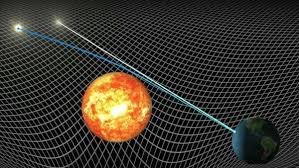

In [ ]:
print("Altitude Of The Sun Above Earth's Limb / DIFFERENCE:\n")
print(Messier87_Document[1].header['SUN_ALT'] - Messier87_Document_2[1].header['SUN_ALT'])

In [ ]:
print("Minimum Wavelength In Spectrum / DIFFERENCE:\n")
print(Messier87_Document[0].header['MINWAVE'] - Messier87_Document_2[0].header['MINWAVE'])

In [ ]:
print("Maximum Wavelength In Spectrum / DIFFERENCE:\n")
print(Messier87_Document[0].header['MAXWAVE'] - Messier87_Document_2[0].header['MAXWAVE'])

##### VALUE

In [ ]:
print("proposer's target name / ONE:\n")
print(Messier87_Document[0].header['targname'])
print("----"*10)
print("proposer's target name / TWO:\n")
print(Messier87_Document_2[0].header['targname'])

In [ ]:
print("Subtract dark image / ONE:\n")
print(Messier87_Document[0].header['DARKCORR'])
print("----"*10)
print("Subtract dark image / TWO:\n")
print(Messier87_Document_2[0].header['DARKCORR'])

In [ ]:
print("general galaxy type / ONE:\n")
print(Messier87_Document[0].header['TARDESCR'])
print("----"*10)
print("general galaxy type / TWO:\n")
print(Messier87_Document_2[0].header['TARDESCR'])

In [ ]:
print("type object / ONE:\n")
print(Messier87_Document[0].header['PROPTTL1'])
print("----"*10)
print("type object / TWO:\n")
print(Messier87_Document_2[0].header['PROPTTL1'])

In [ ]:
print("imaging or spectroscopic / ONE:\n")
print(Messier87_Document[0].header['OBSTYPE'])
print("----"*10)
print("imaging or spectroscopic / TWO:\n")
print(Messier87_Document_2[0].header['OBSTYPE'])

#### ALL OBJECTS

##### READING OBJECTS

In [ ]:
Example_Path_1 = Messier_87_Fits_Series[0]
Example_Path_2 = Messier_87_Fits_Series[1]
Example_Path_3 = Messier_87_Fits_Series[2]
Example_Path_4 = Messier_87_Fits_Series[3]
Example_Path_5 = Messier_87_Fits_Series[4]
Example_Path_6 = Messier_87_Fits_Series[5]
Example_Path_7 = Messier_87_Fits_Series[6]
Example_Path_8 = Messier_87_Fits_Series[7]


Messier87_Document_1 = fits.open(Example_Path_1)
Messier87_Document_2 = fits.open(Example_Path_2)
Messier87_Document_3 = fits.open(Example_Path_3)
Messier87_Document_4 = fits.open(Example_Path_4)
Messier87_Document_5 = fits.open(Example_Path_5)
Messier87_Document_6 = fits.open(Example_Path_6)
Messier87_Document_7 = fits.open(Example_Path_7)
Messier87_Document_8 = fits.open(Example_Path_8)

* x13c0201t series is different from others

In [ ]:
print(Messier_87_Fits_Series[6])

In [ ]:
print(Messier_87_Fits_Series[7])

In [ ]:
print("INFORMATION\n")
print(Messier87_Document_7.info())

In [ ]:
print("INFORMATION\n")
print(Messier87_Document_8.info())

In [ ]:
Messier87_Document_7[1].columns

In [ ]:
Messier87_Document_8[1].columns

In [ ]:
Messier87_Document_7[1].columns.info()

In [ ]:
Messier87_Document_8[1].columns.info()

In [ ]:
Messier87_Document_7[1].columns.names

In [ ]:
Messier87_Document_8[1].columns.names

In [ ]:
DATA_One = Messier87_Document_7[1].data
DATA_Two = Messier87_Document_8[1].data

In [ ]:
print(DATA_One['CRVAL1'])
print("---"*10)
print(DATA_Two['CRVAL1'])
print("----"*20)
print(DATA_One['CRPIX1'])
print("---"*10)
print(DATA_Two['CRPIX1'])
print("----"*20)
print(DATA_One['CD1_1'])
print("---"*10)
print(DATA_Two['CD1_1'])
print("----"*20)
print(DATA_One['CD2_1'])
print("---"*10)
print(DATA_Two['CD2_1'])
print("----"*20)
print(DATA_One['ORIENTAT'])
print("---"*10)
print(DATA_Two['ORIENTAT'])

In [ ]:
IMG_7 = Messier87_Document_7[0].data
IMG_8 = Messier87_Document_8[0].data

In [ ]:
figure = plt.figure(figsize=(12,12))
plt.imshow(IMG_7,cmap="gray")
plt.xlabel(f"{Messier87_Document_7[0].header['CD1_1']} - {Messier87_Document_7[0].header['CD1_2']}\n {Messier87_Document_7[0].header['CD2_1']} - {Messier87_Document_7[0].header['CD2_2']}")
plt.ylabel(f"{Messier87_Document_7[0].header['DEC_TARG']}\n{Messier87_Document_7[0].header['RA_TARG']}")
plt.colorbar()
plt.show()

In [ ]:
figure = plt.figure(figsize=(12,12))
plt.imshow(IMG_8,cmap="gray")
plt.xlabel(f"{Messier87_Document_8[0].header['CD1_1']} - {Messier87_Document_8[0].header['CD1_2']}\n {Messier87_Document_8[0].header['CD2_1']} - {Messier87_Document_8[0].header['CD2_2']}")
plt.ylabel(f"{Messier87_Document_8[0].header['DEC_TARG']}\n{Messier87_Document_8[0].header['RA_TARG']}")
plt.colorbar()
plt.show()

* hst_08686_09_wfpc2_fr680p15_pc_drz has 3 images

In [ ]:
print(Messier87_Document_4.info())

In [ ]:
IMG_4_I = Messier87_Document_4[1].data
IMG_4_II = Messier87_Document_4[2].data
IMG_4_III = Messier87_Document_4[2].data

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(19,12))
axis[0].imshow(IMG_4_I,cmap="gray")
axis[1].imshow(IMG_4_II,cmap="gray")
axis[2].imshow(IMG_4_III,cmap="gray")

##### OBJECTS IMAGES

In [ ]:
IMG_1 = Messier87_Document_1[1].data
IMG_2 = Messier87_Document_2[1].data
IMG_3 = Messier87_Document_3[1].data
IMG_4 = Messier87_Document_4[1].data # pick one
IMG_5 = Messier87_Document_5[1].data
IMG_6 = Messier87_Document_6[1].data

In [ ]:
figure,axis = plt.subplots(1,6,figsize=(19,12))
axis[0].imshow(IMG_1,cmap="hot")
axis[1].imshow(IMG_2,cmap="hot")
axis[2].imshow(IMG_3,cmap="hot")
axis[3].imshow(IMG_4,cmap="hot")
axis[4].imshow(IMG_5,cmap="hot")
axis[5].imshow(IMG_6,cmap="hot")

figure,axis = plt.subplots(1,6,figsize=(19,12))
axis[0].imshow(IMG_1,cmap="jet")
axis[1].imshow(IMG_2,cmap="jet")
axis[2].imshow(IMG_3,cmap="jet")
axis[3].imshow(IMG_4,cmap="jet")
axis[4].imshow(IMG_5,cmap="jet")
axis[5].imshow(IMG_6,cmap="jet")


figure,axis = plt.subplots(1,6,figsize=(19,12))
axis[0].imshow(IMG_1,cmap="Spectral")
axis[1].imshow(IMG_2,cmap="Spectral")
axis[2].imshow(IMG_3,cmap="Spectral")
axis[3].imshow(IMG_4,cmap="Spectral")
axis[4].imshow(IMG_5,cmap="Spectral")
axis[5].imshow(IMG_6,cmap="Spectral")


figure,axis = plt.subplots(1,6,figsize=(19,12))
axis[0].imshow(IMG_1,cmap="gray")
axis[1].imshow(IMG_2,cmap="gray")
axis[2].imshow(IMG_3,cmap="gray")
axis[3].imshow(IMG_4,cmap="gray")
axis[4].imshow(IMG_5,cmap="gray")
axis[5].imshow(IMG_6,cmap="gray")


figure,axis = plt.subplots(1,6,figsize=(19,12))
axis[0].imshow(IMG_1)
axis[1].imshow(IMG_2)
axis[2].imshow(IMG_3)
axis[3].imshow(IMG_4)
axis[4].imshow(IMG_5)
axis[5].imshow(IMG_6)
plt.show()

In [ ]:
IMG_1_F = IMG_1.flatten()
IMG_2_F = IMG_2.flatten()
IMG_3_F = IMG_3.flatten()
IMG_4_F = IMG_4.flatten()
IMG_5_F = IMG_5.flatten()
IMG_6_F = IMG_6.flatten()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.kdeplot(IMG_1_F,label="IMAGE ONE")
sns.kdeplot(IMG_2_F,label="IMAGE TWO")
sns.kdeplot(IMG_3_F,label="IMAGE THREE")
sns.kdeplot(IMG_5_F,label="IMAGE FIVE")
sns.kdeplot(IMG_6_F,label="IMAGE SIX")
plt.title("COMPARING KDE")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.histplot(IMG_1_F,multiple="stack",edgecolor=".3",linewidth=.2,color="red",label="IMAGE ONE")
sns.histplot(IMG_2_F,multiple="stack",edgecolor=".3",linewidth=.3,color="green",label="IMAGE TWO")
sns.histplot(IMG_3_F,multiple="stack",edgecolor=".3",linewidth=.4,color="white",label="IMAGE THREE")
sns.histplot(IMG_5_F,multiple="stack",edgecolor=".3",linewidth=.5,color="blue",label="IMAGE FIVE")
sns.histplot(IMG_6_F,multiple="stack",edgecolor=".3",linewidth=.6,color="yellow",label="IMAGE SIX")
plt.title("COMPARING HIST")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
plt.magnitude_spectrum(IMG_1_F,label="IMAGE ONE")
plt.magnitude_spectrum(IMG_2_F,label="IMAGE TWO")
plt.magnitude_spectrum(IMG_3_F,label="IMAGE THREE")
plt.magnitude_spectrum(IMG_5_F,label="IMAGE FIVE")
plt.magnitude_spectrum(IMG_6_F,label="IMAGE SIX")
plt.title("COMPARING Magnitude Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
print("proposer's target name:\n")
print(Messier87_Document_1[0].header['targname'])
print("----"*10)
print(Messier87_Document_2[0].header['targname'])
print("----"*10)
print(Messier87_Document_3[0].header['targname'])
print("----"*10)
print(Messier87_Document_4[0].header['targname'])
print("----"*10)
print(Messier87_Document_5[0].header['targname'])
print("----"*10)
print(Messier87_Document_6[0].header['targname'])
print("----"*25)
print("Subtract dark image:\n")
print(Messier87_Document_1[0].header['DARKCORR'])
print("----"*10)
print(Messier87_Document_2[0].header['DARKCORR'])
print("----"*10)
print(Messier87_Document_3[0].header['DARKCORR'])
print("----"*10)
print(Messier87_Document_4[0].header['DARKCORR'])
print("----"*10)
print(Messier87_Document_5[0].header['DARKCORR'])
print("----"*10)
print(Messier87_Document_6[0].header['DARKCORR'])
print("----"*25)
print("general galaxy type:\n")
print(Messier87_Document_1[0].header['TARDESCR'])
print("----"*10)
print(Messier87_Document_2[0].header['TARDESCR'])
print("----"*10)
print(Messier87_Document_3[0].header['TARDESCR'])
print("----"*10)
print(Messier87_Document_5[0].header['TARDESCR'])
print("----"*10)
print(Messier87_Document_6[0].header['TARDESCR'])
print("----"*25)
print("type object:\n")
print(Messier87_Document_1[0].header['PROPTTL1'])
print("----"*10)
print(Messier87_Document_2[0].header['PROPTTL1'])
print("----"*10)
print(Messier87_Document_3[0].header['PROPTTL1'])
print("----"*10)
print(Messier87_Document_5[0].header['PROPTTL1'])
print("----"*10)
print(Messier87_Document_6[0].header['PROPTTL1'])
print("----"*25)
print("imaging or spectroscopic:\n")
print(Messier87_Document_1[0].header['OBSTYPE'])
print("----"*10)
print(Messier87_Document_2[0].header['OBSTYPE'])
print("----"*10)
print(Messier87_Document_3[0].header['OBSTYPE'])
print("----"*10)
print(Messier87_Document_5[0].header['OBSTYPE'])
print("----"*10)
print(Messier87_Document_6[0].header['OBSTYPE'])
print("----"*25)

## END OF CHAPTER ONE

## WE WILL USE BIG DATA FOR THE LAST CHAPTER. THE DATA CONTAINS ALL OBJECTS LOCATED AT THE CENTER OF THE M87 GALAXY

#### THANK YOU SO MUCH!